#### Download Assets

In [5]:
urls = ["https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/bb29f06b207f8ec7f7c49c9e13f4115da8db2669/assets/runway.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/emma_salt_pepper.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/highlights_and_shadows.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/looking_out.jpg"]

for url in urls:
    raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    !wget -q {raw_url} -O {raw_url.split("/")[-1]}

!ls *.jpg *.png

emma_salt_pepper.jpg	    looking_out.jpg  solution_q1.png
highlights_and_shadows.jpg  runway.png


#### Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 01

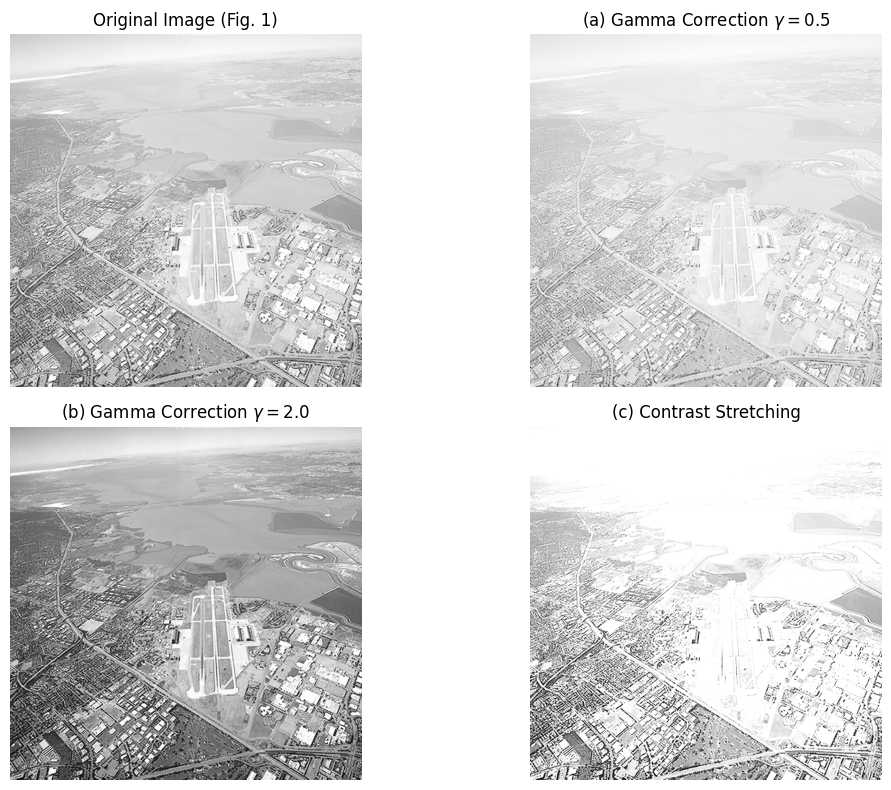

In [ ]:
# 1. Load the image in Grayscale
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

# Normalize pixel values to range [0, 1] for mathematical operations
r = img / 255.0

# ---------------------------------------------------------
# (a) Gamma Correction with gamma = 0.5 (Brightening)
# Formula: s = r ^ 0.5
# ---------------------------------------------------------
gamma_a = 0.5
s_a = np.power(r, gamma_a)
# Convert back to [0, 255] for display
img_gamma_05 = np.uint8(np.clip(s_a * 255, 0, 255))

# ---------------------------------------------------------
# (b) Gamma Correction with gamma = 2.0 (Darkening)
# Formula: s = r ^ 2.0
# ---------------------------------------------------------
gamma_b = 2.0
s_b = np.power(r, gamma_b)
# Convert back to [0, 255] for display
img_gamma_2 = np.uint8(np.clip(s_b * 255, 0, 255))

# ---------------------------------------------------------
# (c) Contrast Stretching (Piecewise Linear)
# r1 = 0.2, r2 = 0.8
# ---------------------------------------------------------
r1 = 0.2
r2 = 0.8

# Initialize output array
s_c = np.zeros_like(r)

# Apply the piecewise conditions vectorized:

# 1. r < r1 -> 0
# (Already 0 from initialization)

# 2. r1 <= r <= r2 -> Scale linearly: (r - r1) / (r2 - r1)
mask_middle = (r >= r1) & (r <= r2)
s_c[mask_middle] = (r[mask_middle] - r1) / (r2 - r1)

# 3. r > r2 -> 1
mask_upper = (r > r2)
s_c[mask_upper] = 1.0

# Convert back to [0, 255]
img_contrast = np.uint8(np.clip(s_c * 255, 0, 255))

# ---------------------------------------------------------
# Visualization
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# Original
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image (Fig. 1)')
plt.axis('off')

# Gamma = 0.5
plt.subplot(2, 2, 2)
plt.imshow(img_gamma_05, cmap='gray', vmin=0, vmax=255)
plt.title(r'(a) Gamma Correction $\gamma=0.5$')
plt.axis('off')

# Gamma = 2.0
plt.subplot(2, 2, 3)
plt.imshow(img_gamma_2, cmap='gray', vmin=0, vmax=255)
plt.title(r'(b) Gamma Correction $\gamma=2.0$')
plt.axis('off')

# Contrast Stretching
plt.subplot(2, 2, 4)
plt.imshow(img_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('(c) Contrast Stretching')
plt.axis('off')

plt.tight_layout()

plt.show()

# Question 02